# Deals - GradientBoostingRegressor
## Import and Load the Data

In [1]:
import warnings
import os
from math import sqrt

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from bidi import algorithm as bidialg

%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv("data/data_deals_done.csv")
except Exception:
    print("Seems we have a problem")

In [3]:
print("File Columns are:", df.columns)
print("Number of rows:", df.shape[0])

File Columns are: Index(['sale_day', 'address', 'property_type', 'rooms_number', 'floor',
       'build_year', 'building_mr', 'city', 'final_price', 'sale_day_year',
       'sale_day_month', 'street', 'street_number', 'neighborhood',
       'address_area', 'address_neighborhood'],
      dtype='object')
Number of rows: 484075


## Choosing the features

In [4]:
used_features = [
    'street', 
    'neighborhood',
    'property_type', 
    'rooms_number', 
    'floor',
    'build_year', 
    'building_mr',
    'city',
    'sale_day_year'
]

### Define remove outliers method

In [5]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.90)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


## Retrieve Cities Names


In [6]:

_cities = df['city'].unique()

cities = []
for city in _cities:
    _df = df.loc[(df['city'] == city)]    
    if len(_df.index) > 250:
        cities.append(city)

test_size = 0.3

cities = {city: {"processor": None, "algo": None, "mse": None, "fig": None} for city in cities if '/' not in city}

print("Total number of cities is:", len(cities))


Total number of cities is: 79


## Running the Algo

חיפה
R2 Score: 0.8353
MSE sqrt: 209760.9104


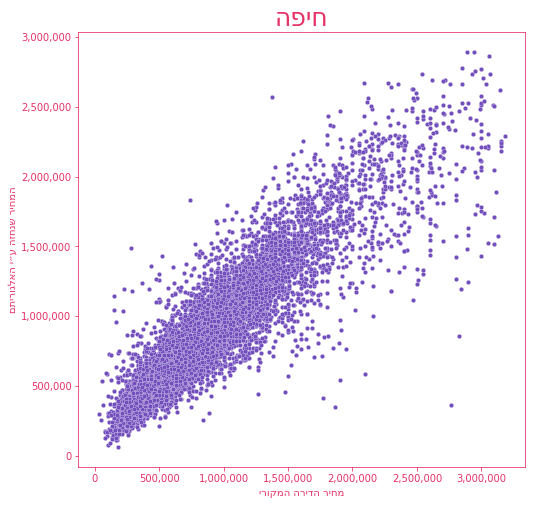

תל אביב יפו
R2 Score: 0.7647
MSE sqrt: 584893.0198


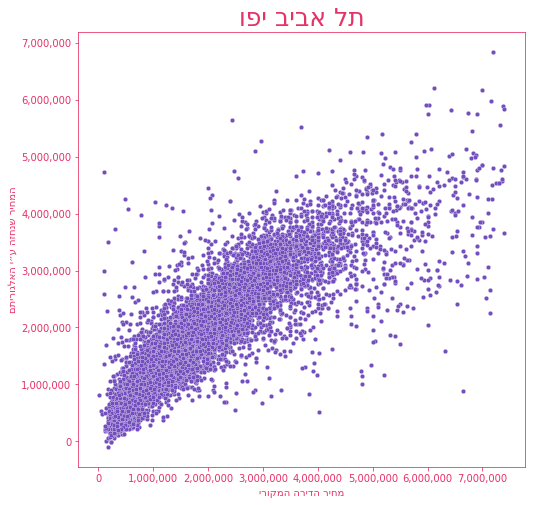

ירושלים
R2 Score: 0.8070
MSE sqrt: 315085.6098


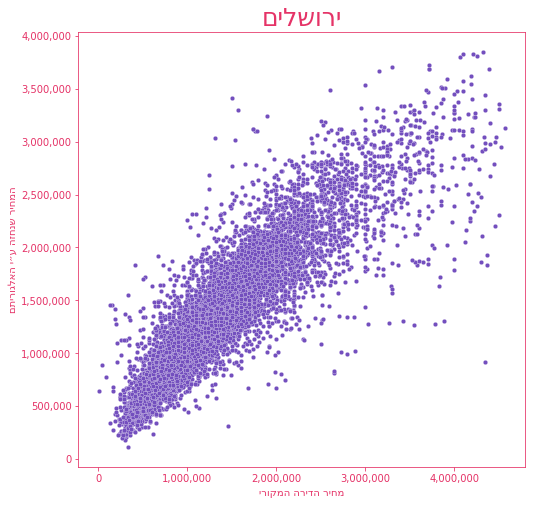

רחובות
R2 Score: 0.8591
MSE sqrt: 188556.4263


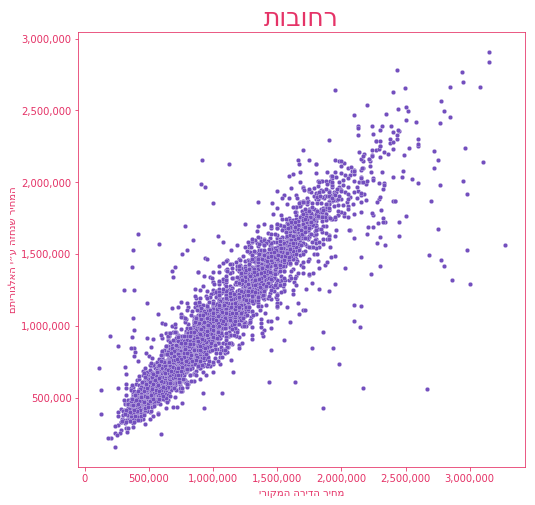

רמת השרון
R2 Score: 0.7862
MSE sqrt: 510033.4630


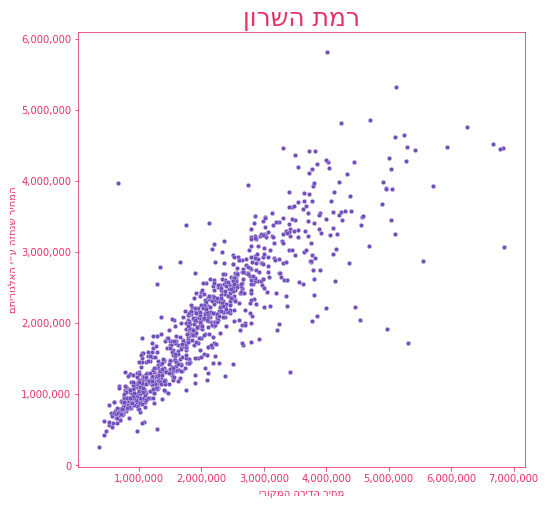

רעננה
R2 Score: 0.8156
MSE sqrt: 336209.3491


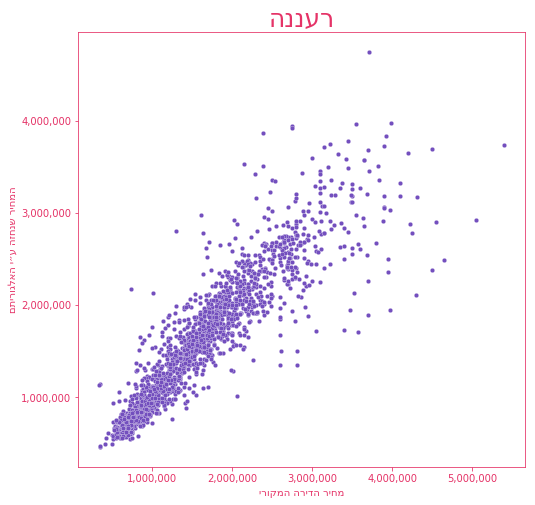

הוד השרון
R2 Score: 0.8521
MSE sqrt: 286729.7099


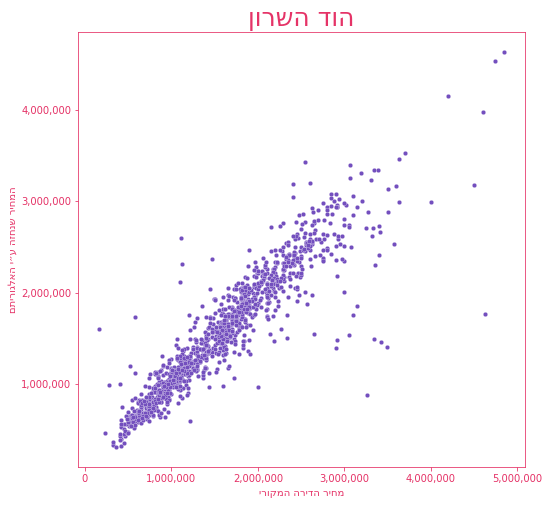

חולון
R2 Score: 0.9058
MSE sqrt: 172037.6103


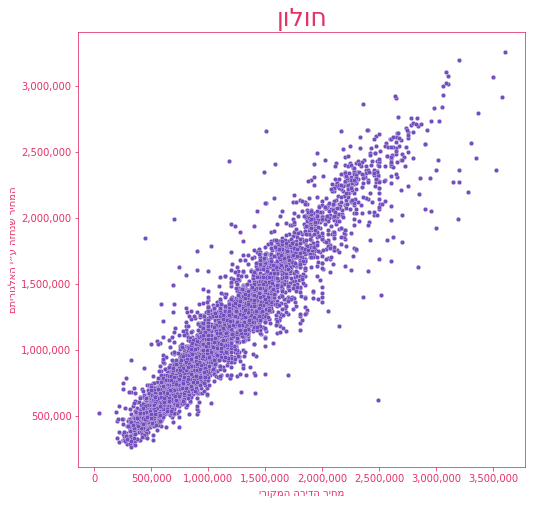

פתח תקווה
R2 Score: 0.9030
MSE sqrt: 178150.0154


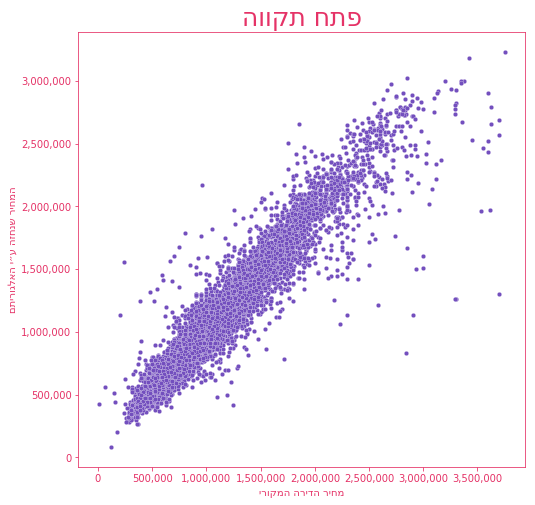

נס ציונה
R2 Score: 0.8292
MSE sqrt: 271813.6154


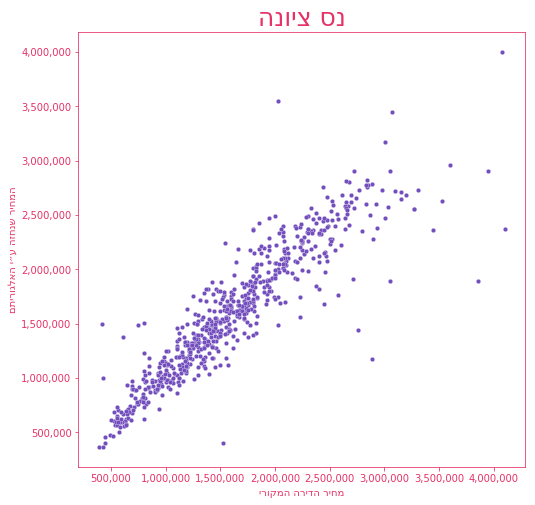

הרצליה
R2 Score: 0.7587
MSE sqrt: 473053.8705


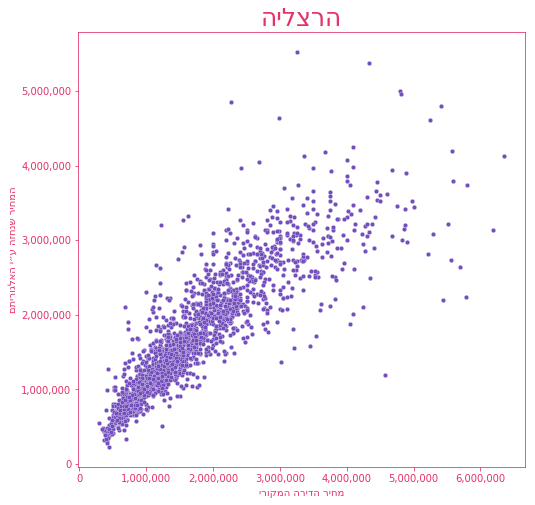

ראשון לציון
R2 Score: 0.8838
MSE sqrt: 192815.7888


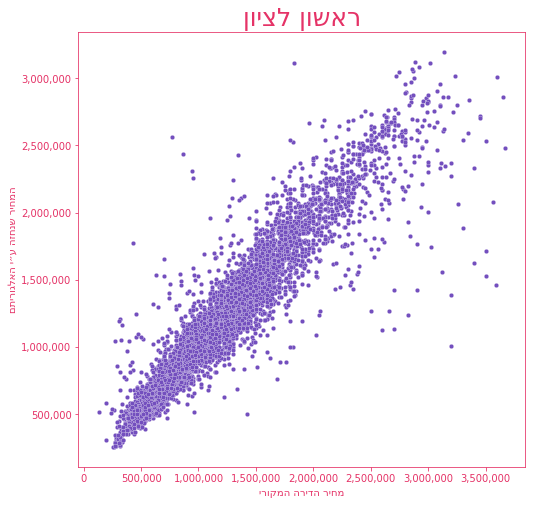

גבעתיים
R2 Score: 0.8137
MSE sqrt: 393473.0011


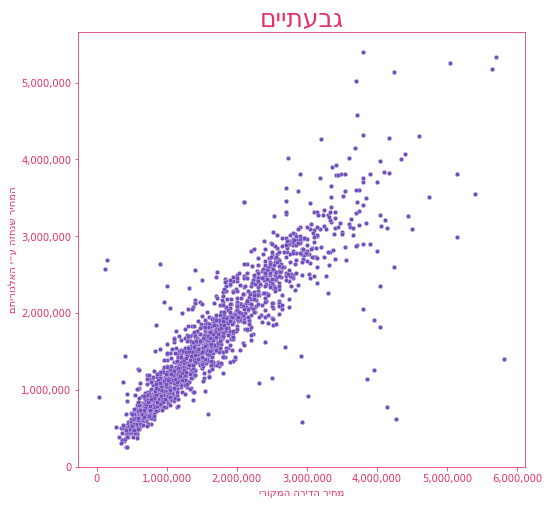

רמת גן
R2 Score: 0.8579
MSE sqrt: 262518.1024


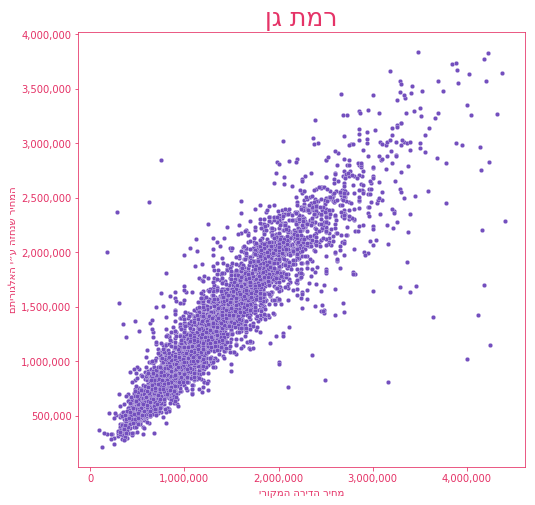

בני ברק
R2 Score: 0.8446
MSE sqrt: 190490.9394


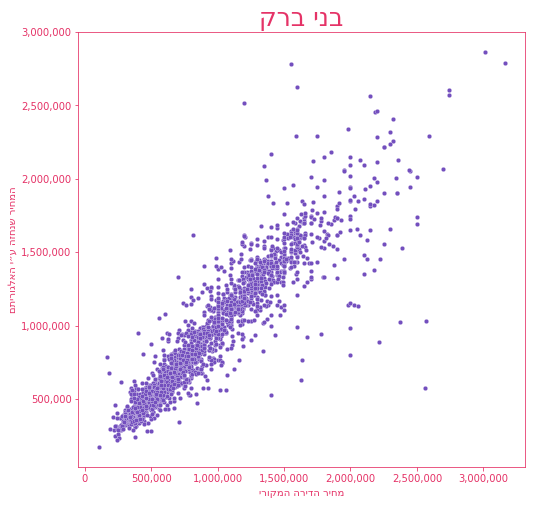

פרדס חנה כרכור
R2 Score: 0.8086
MSE sqrt: 231346.9086


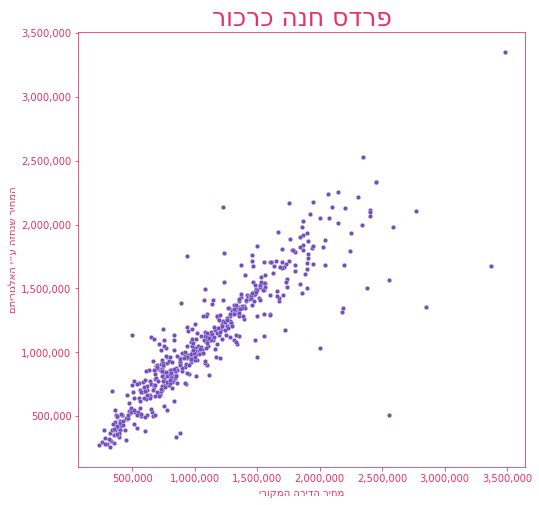

זכרון יעקב
R2 Score: 0.5665
MSE sqrt: 715813.6079


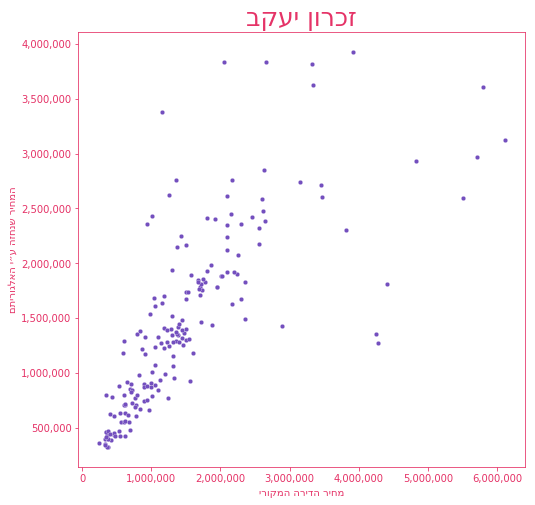

גדרה
R2 Score: 0.8917
MSE sqrt: 159811.9773


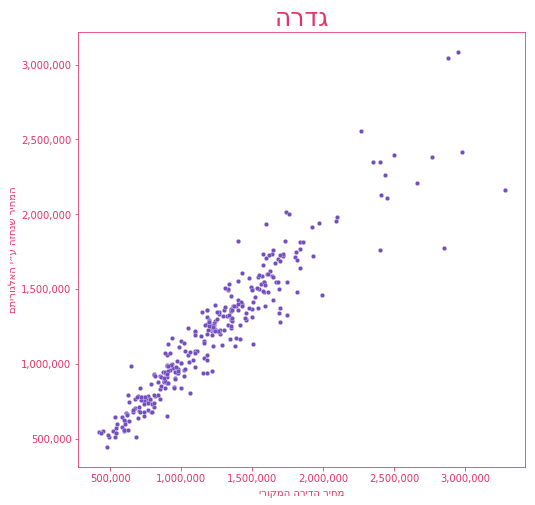

נתניה
R2 Score: 0.8747
MSE sqrt: 221788.4889


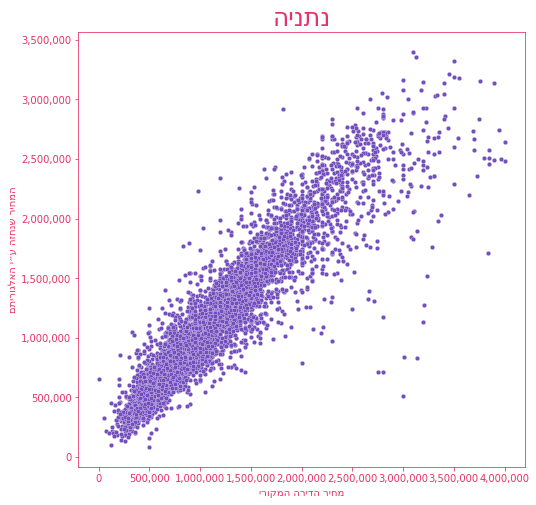

גן יבנה
R2 Score: -0.0007
MSE sqrt: 1404717.3061


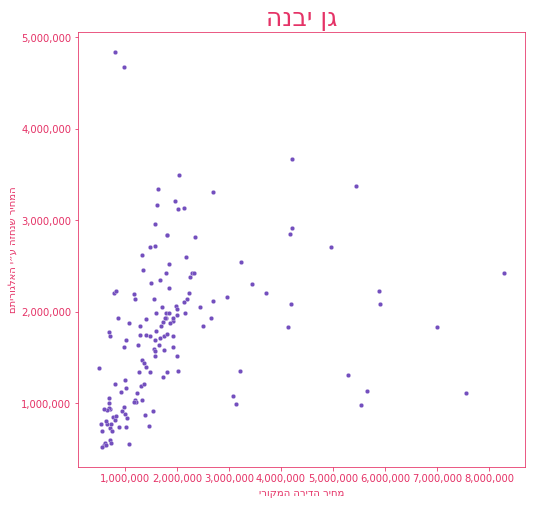

מזכרת בתיה
R2 Score: 0.6982
MSE sqrt: 405356.0937


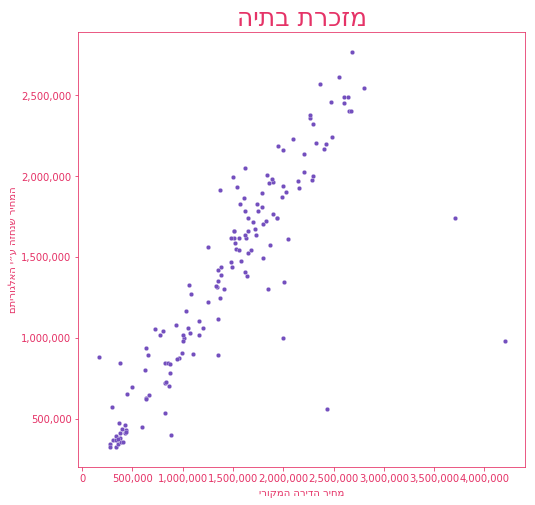

עפולה
R2 Score: 0.8090
MSE sqrt: 132147.6978


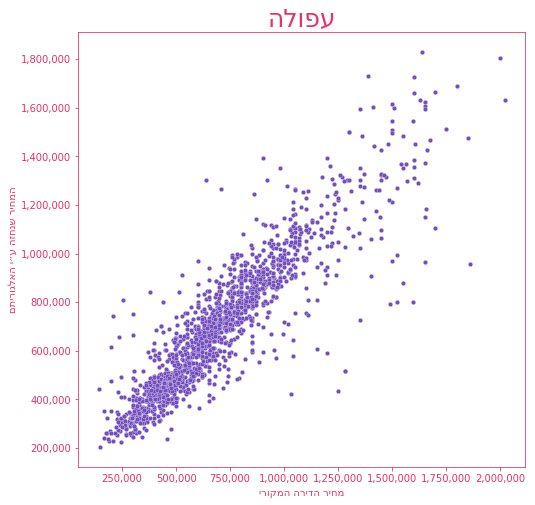

מבשרת ציון
R2 Score: 0.7739
MSE sqrt: 371111.2681


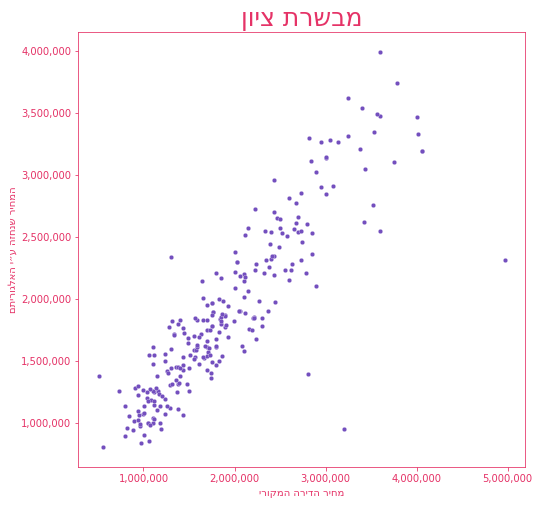

באר יעקב
R2 Score: 0.8538
MSE sqrt: 180045.5753


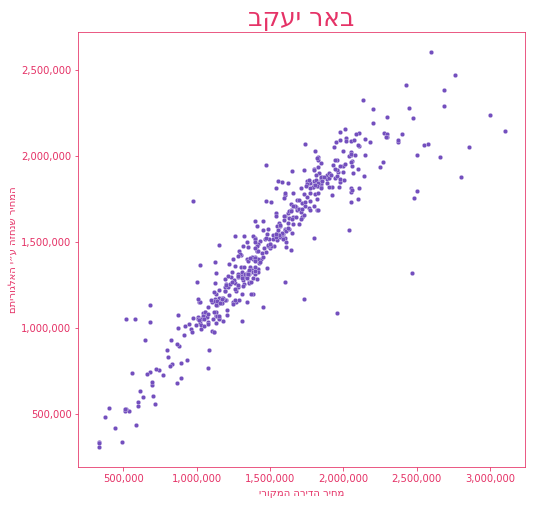

צפת
R2 Score: 0.7218
MSE sqrt: 154767.1416


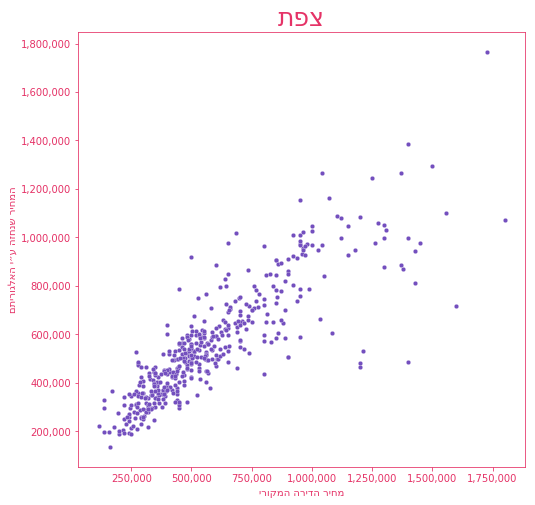

בת ים
R2 Score: 0.8746
MSE sqrt: 194581.1816


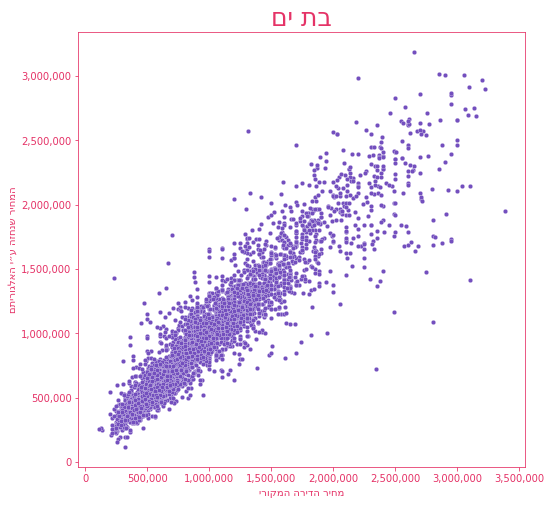

כפר יונה
R2 Score: 0.6987
MSE sqrt: 278998.5131


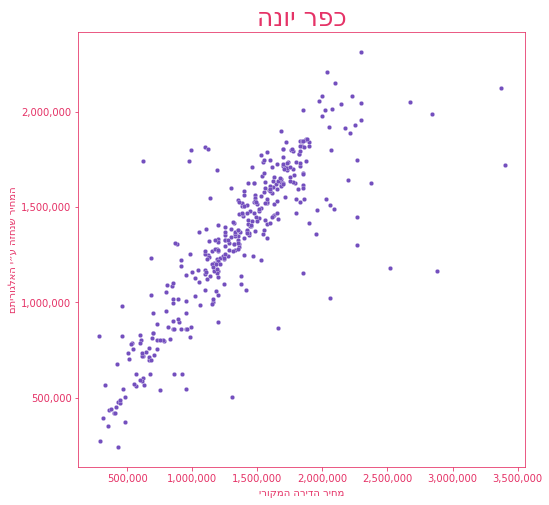

נהריה
R2 Score: 0.8285
MSE sqrt: 163751.9172


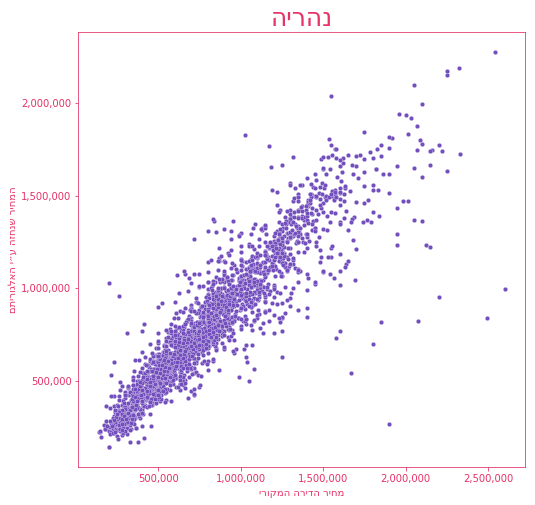

קרית אתא
R2 Score: 0.8439
MSE sqrt: 156668.1666


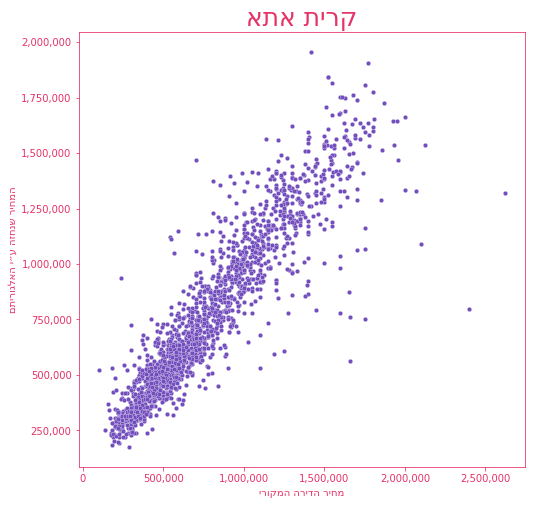

קרית ביאליק
R2 Score: 0.8255
MSE sqrt: 156104.9821


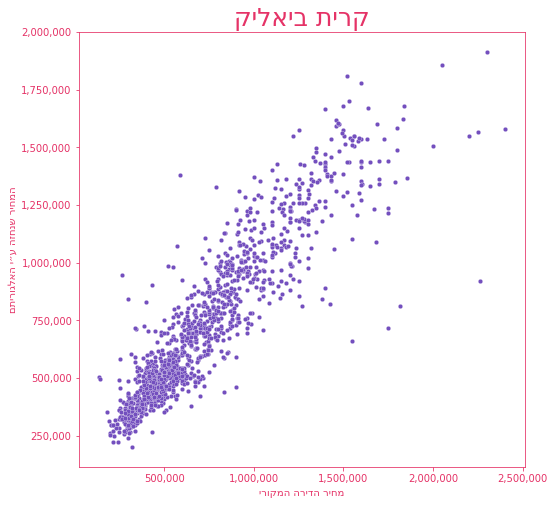

שוהם
R2 Score: 0.7997
MSE sqrt: 305144.3160


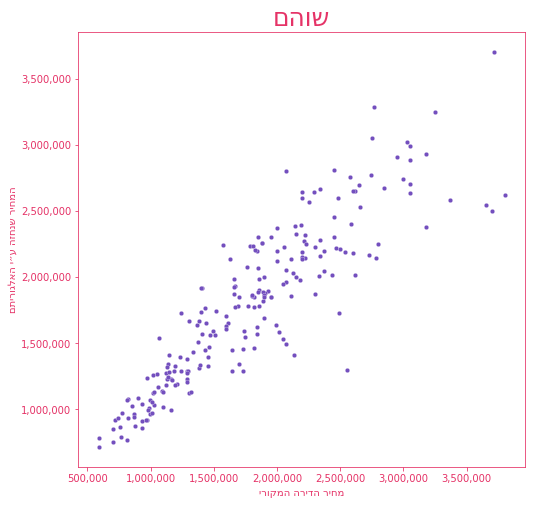

גבעת שמואל
R2 Score: 0.8520
MSE sqrt: 272365.2091


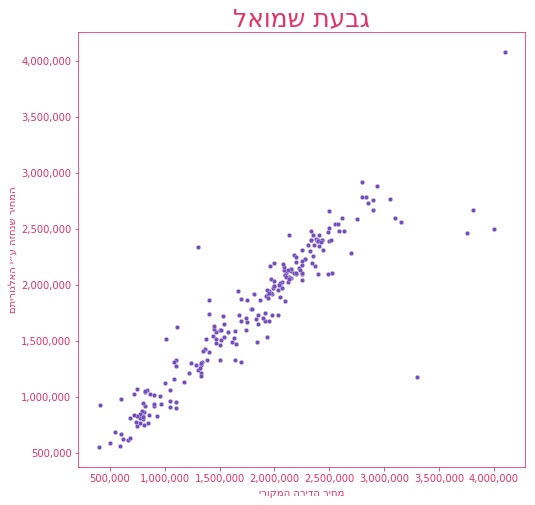

חדרה
R2 Score: 0.8381
MSE sqrt: 175995.3740


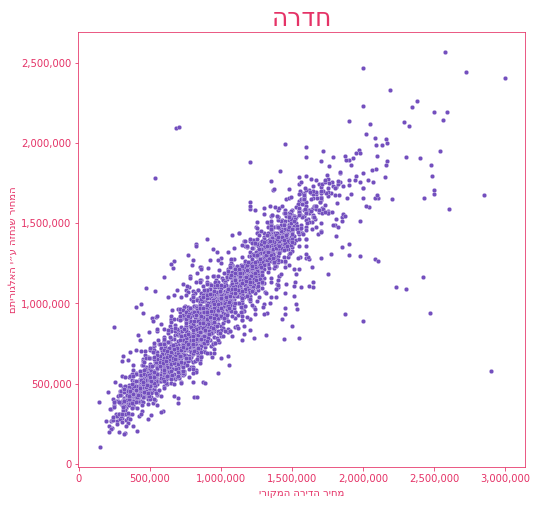

טבריה
R2 Score: 0.7831
MSE sqrt: 137777.4123


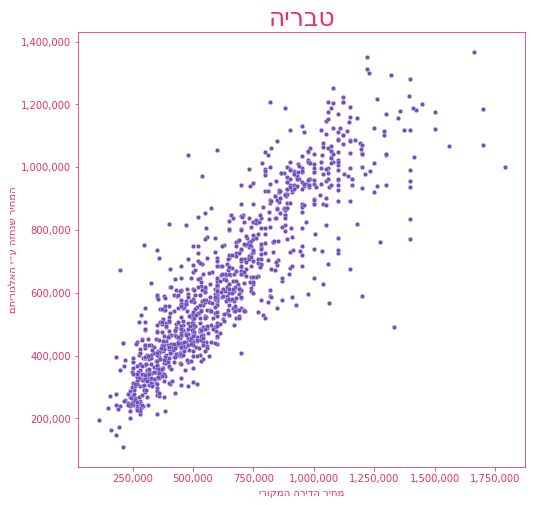

מעלה אדומים
R2 Score: 0.9217
MSE sqrt: 132047.8725


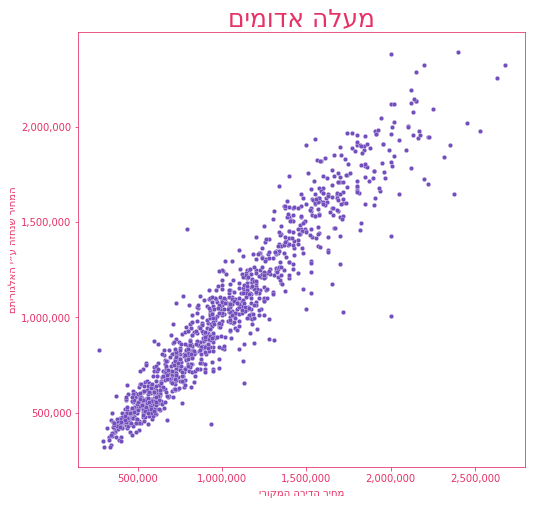

ראש העין
R2 Score: 0.8033
MSE sqrt: 192622.2676


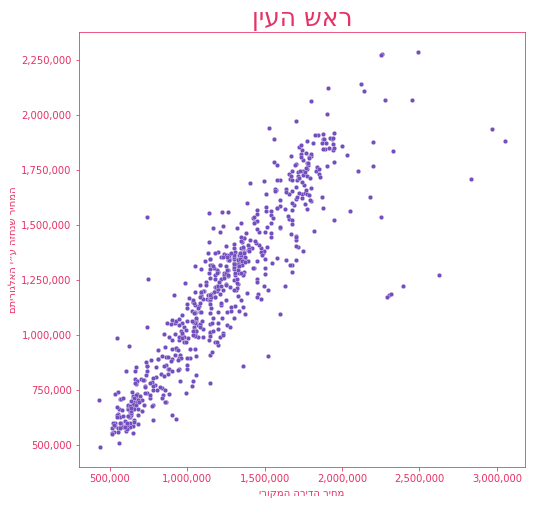

רמלה
R2 Score: 0.8848
MSE sqrt: 161932.4752


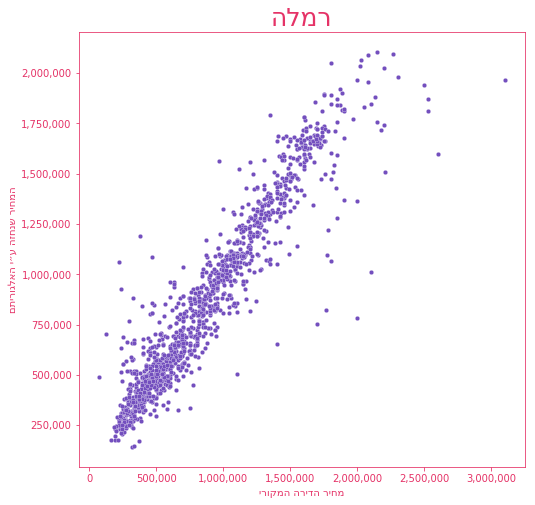

אשדוד
R2 Score: 0.8879
MSE sqrt: 181172.4289


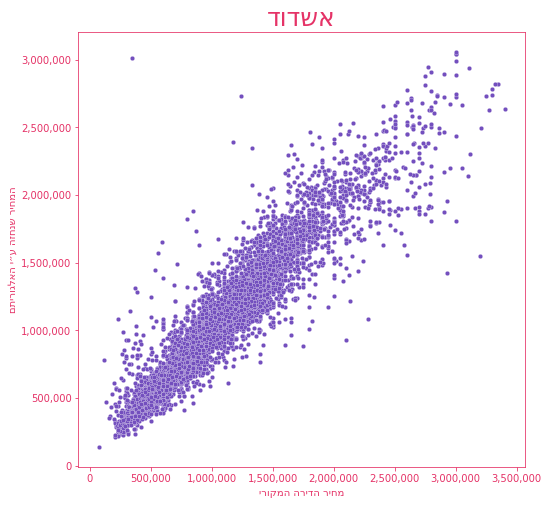

יהוד מונוסון
R2 Score: 0.8130
MSE sqrt: 251627.0390


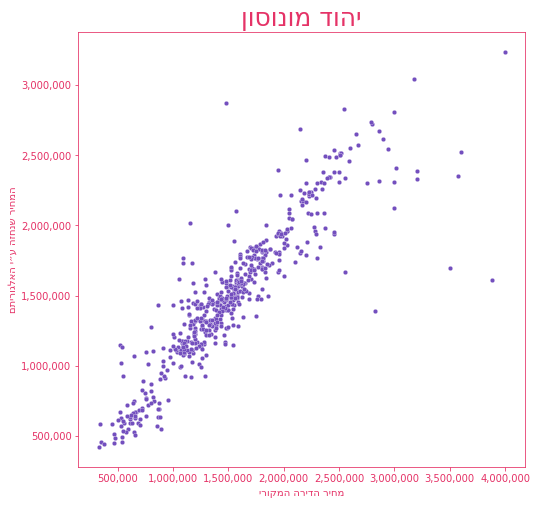

אשקלון
R2 Score: 0.8712
MSE sqrt: 136869.3876


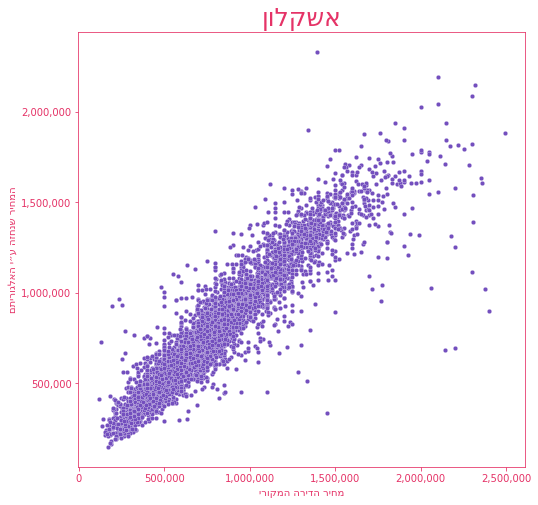

קרית מלאכי
R2 Score: 0.8477
MSE sqrt: 127721.6439


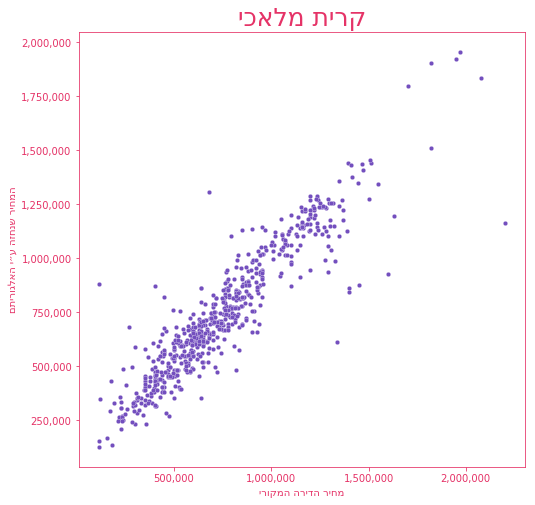

אריאל
R2 Score: 0.8880
MSE sqrt: 121685.7719


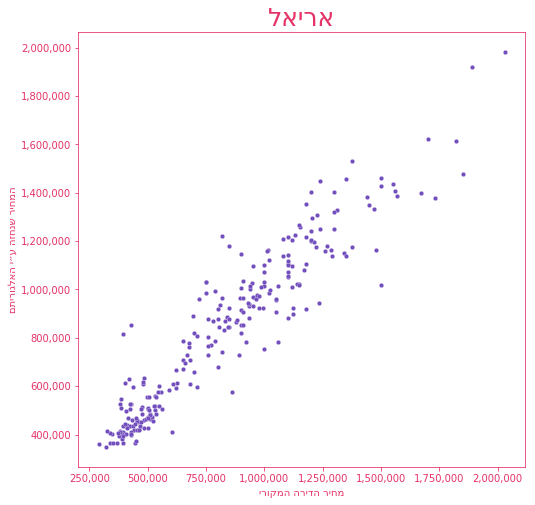

אור עקיבא
R2 Score: 0.8387
MSE sqrt: 162830.4906


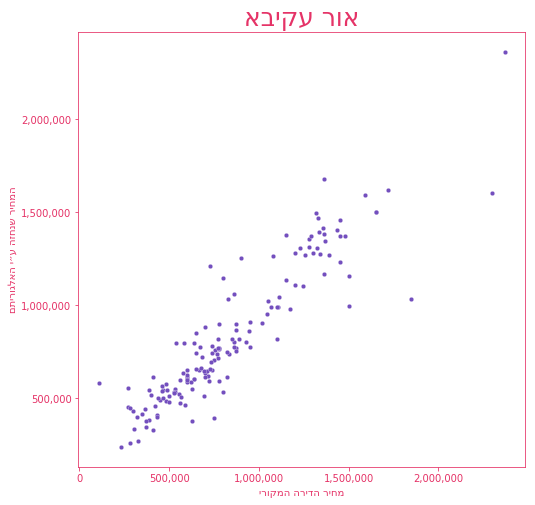

קרית גת
R2 Score: 0.8488
MSE sqrt: 129177.5203


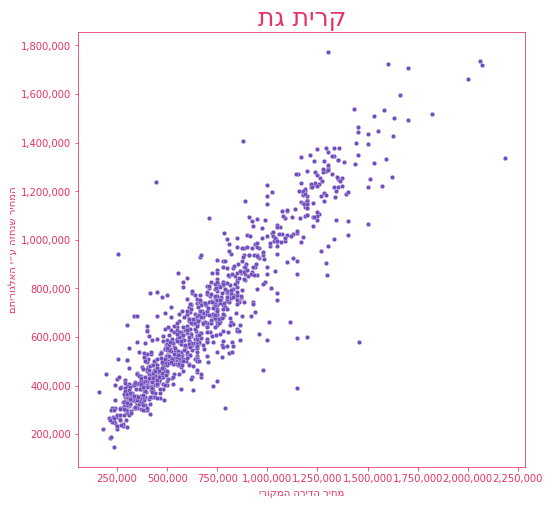

קרית אונו
R2 Score: 0.8437
MSE sqrt: 344797.9190


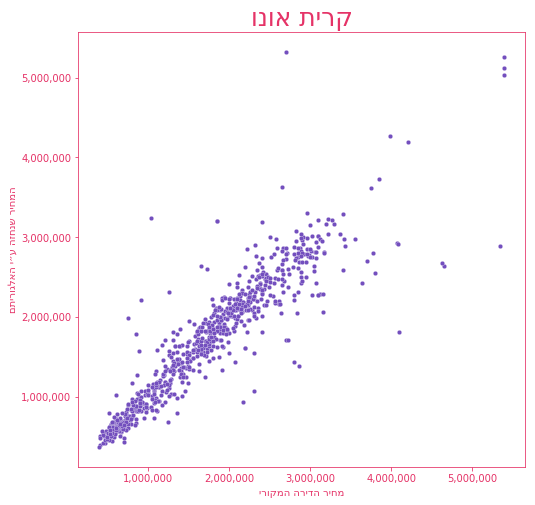

אזור
R2 Score: 0.8637
MSE sqrt: 224846.8406


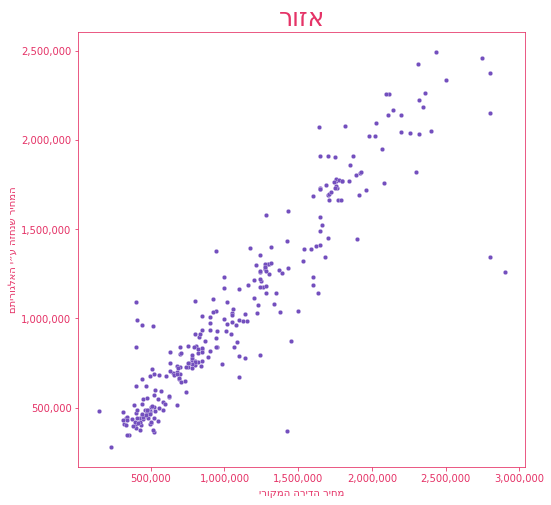

קדימה צורן
R2 Score: 0.7963
MSE sqrt: 265568.4257


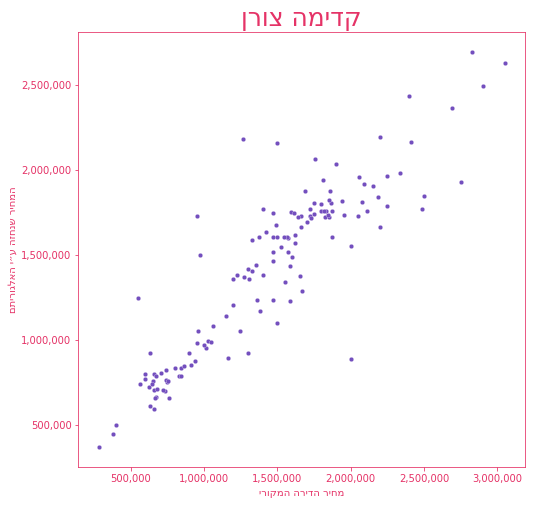

קרית מוצקין
R2 Score: 0.8779
MSE sqrt: 149181.4167


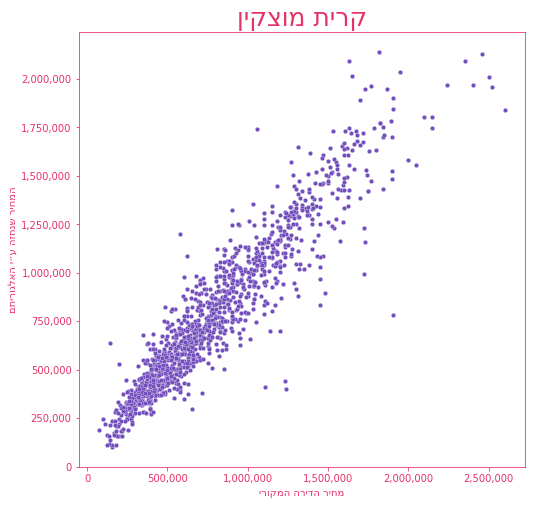

עכו
R2 Score: 0.8453
MSE sqrt: 129517.2994


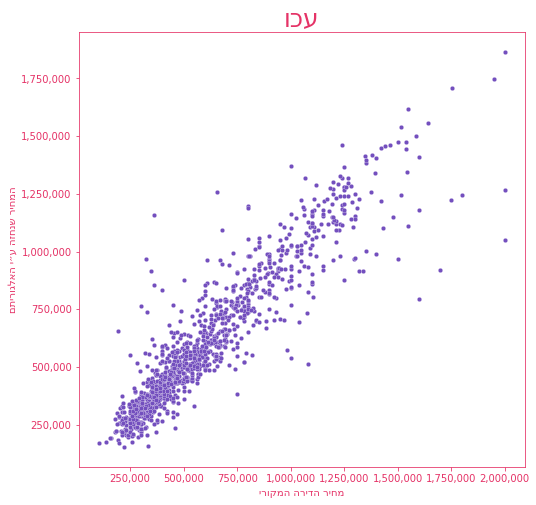

כפר סבא
R2 Score: 0.8672
MSE sqrt: 236005.3849


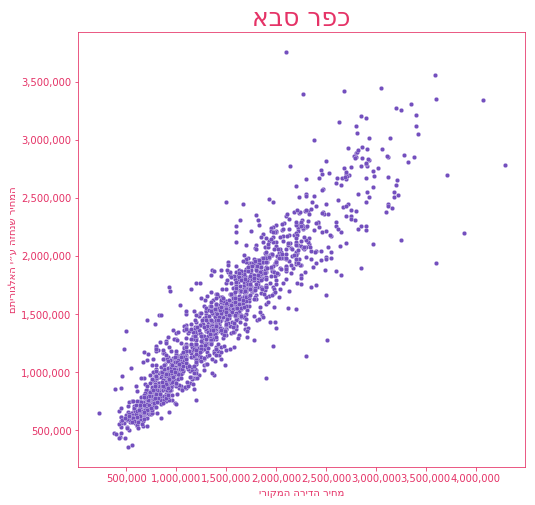

לוד
R2 Score: 0.8749
MSE sqrt: 120225.7617


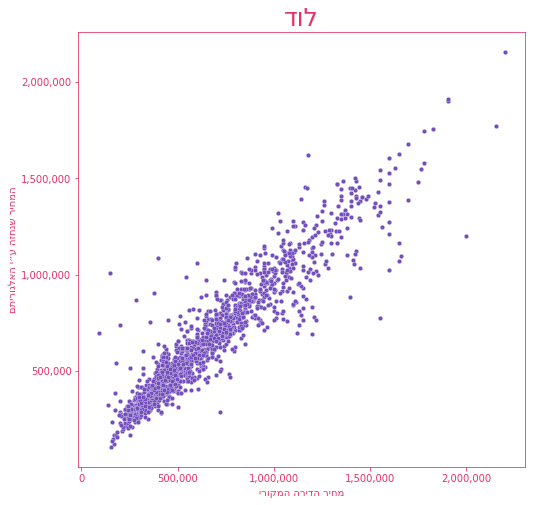

גני תקווה
R2 Score: 0.8616
MSE sqrt: 297166.6283


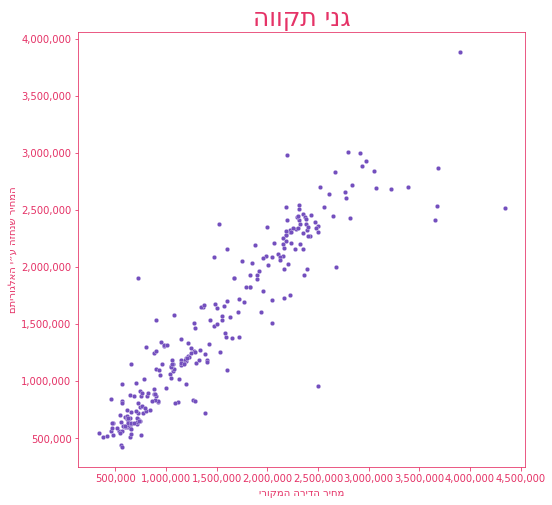

קרית שמונה
R2 Score: 0.6368
MSE sqrt: 112192.7722


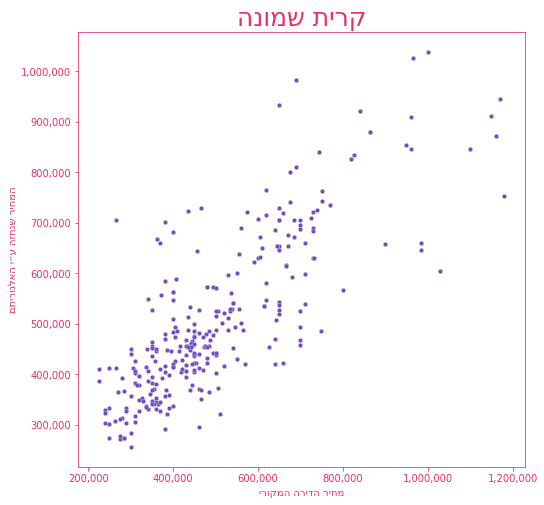

אור יהודה
R2 Score: 0.8641
MSE sqrt: 175479.4967


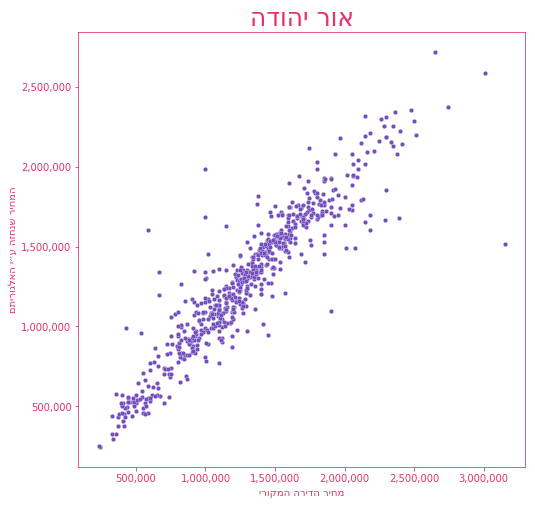

נשר
R2 Score: 0.8650
MSE sqrt: 127523.7283


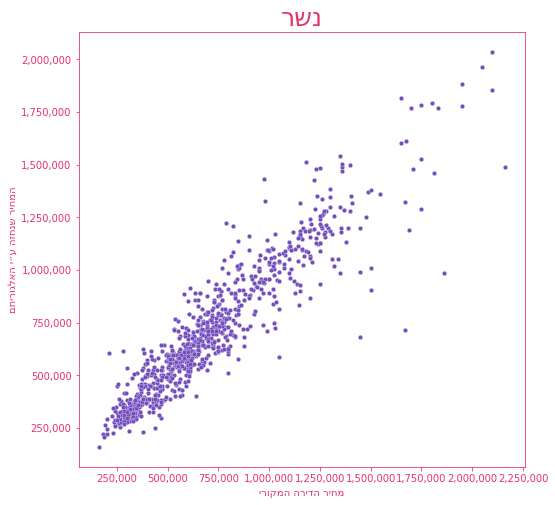

באר שבע
R2 Score: 0.8756
MSE sqrt: 117844.9307


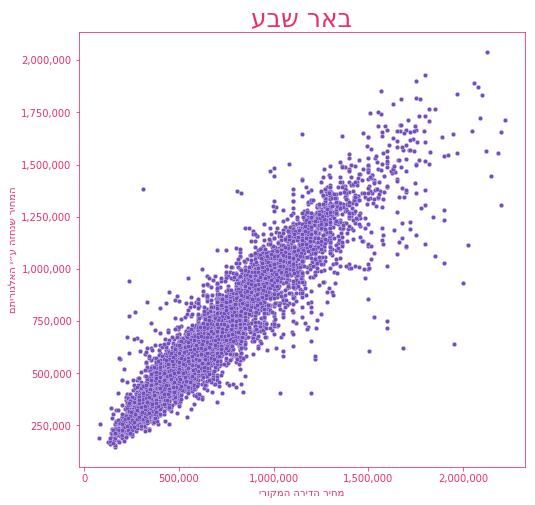

מודיעין מכבים רעות
R2 Score: 0.8967
MSE sqrt: 202320.7041


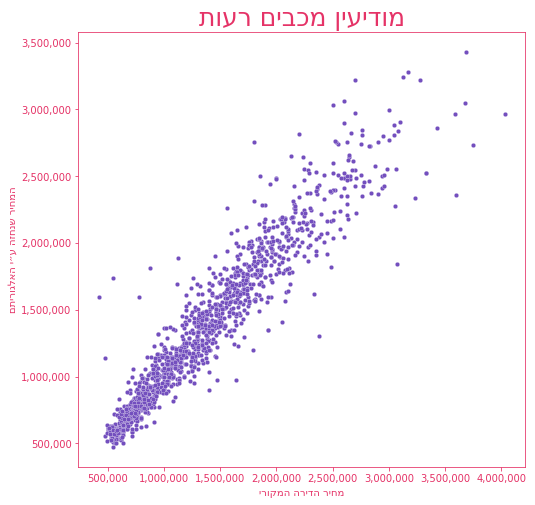

אילת
R2 Score: 0.8216
MSE sqrt: 163594.8097


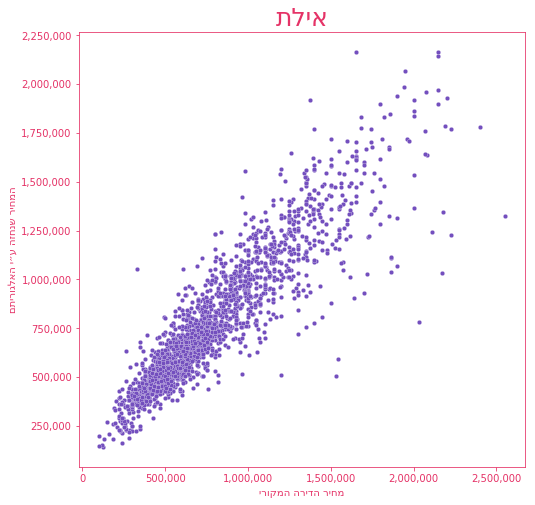

נצרת עילית
R2 Score: 0.7596
MSE sqrt: 157868.3849


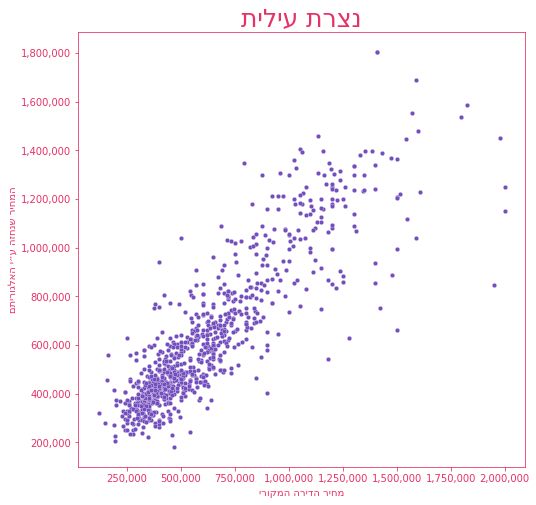

בית שמש
R2 Score: 0.8365
MSE sqrt: 178314.7065


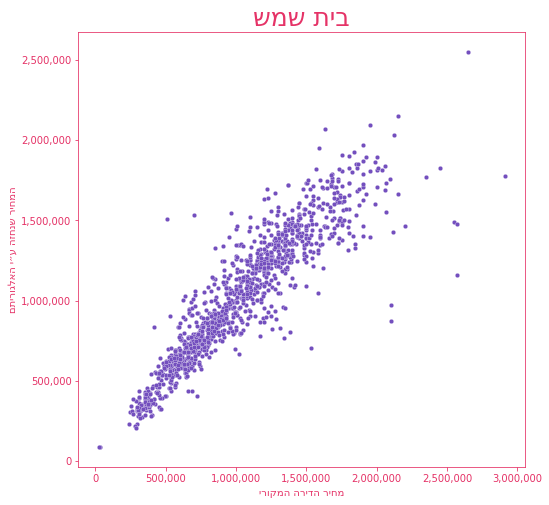

יבנה
R2 Score: 0.8939
MSE sqrt: 166865.8883


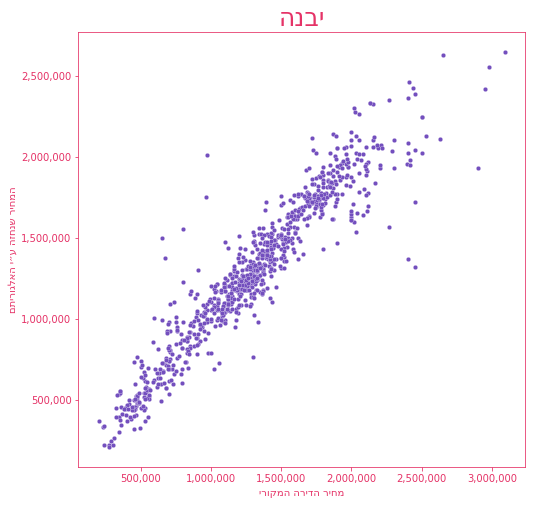

צור הדסה
R2 Score: 0.8408
MSE sqrt: 197520.3074


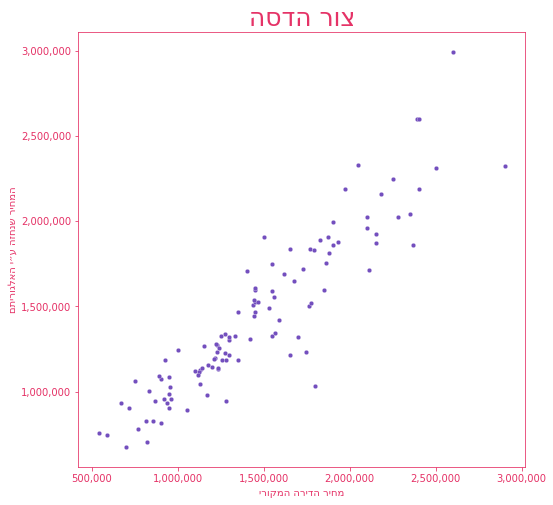

מודיעין עילית
R2 Score: 0.6232
MSE sqrt: 221023.6949


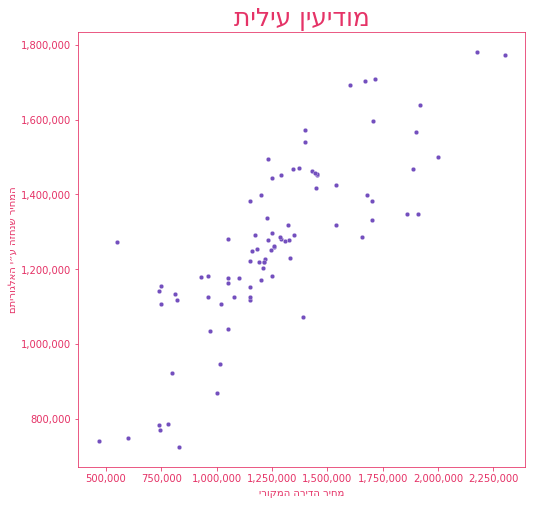

גבעת זאב
R2 Score: 0.8357
MSE sqrt: 219052.0868


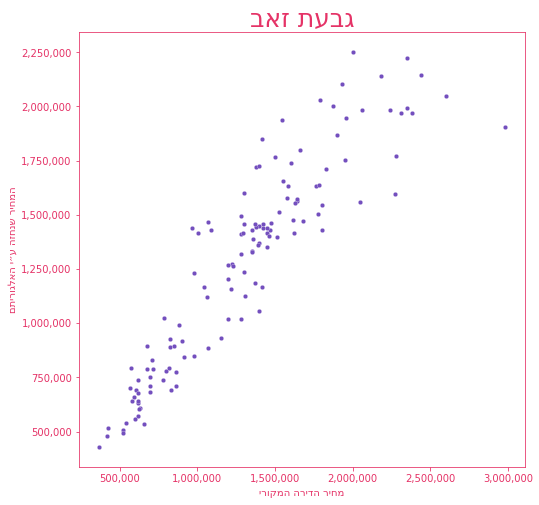

בית שאן
R2 Score: 0.6953
MSE sqrt: 142516.1560


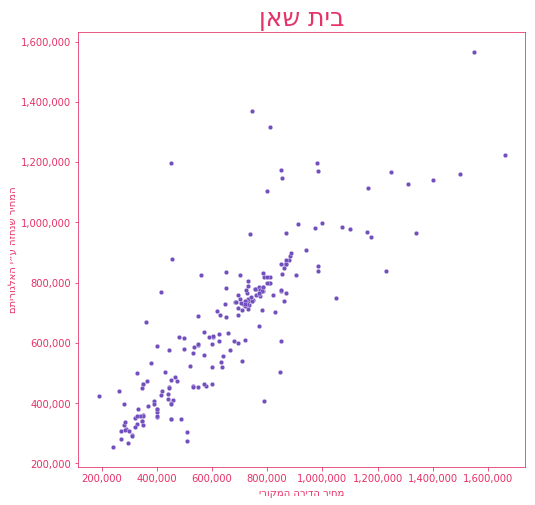

קצרין
R2 Score: 0.7712
MSE sqrt: 117807.0904


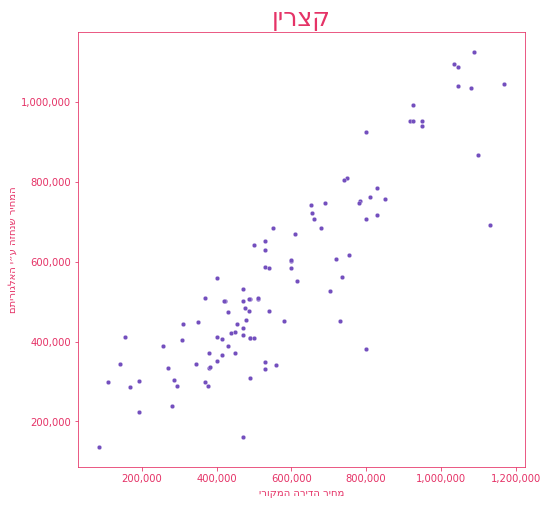

ביתר עילית
R2 Score: 0.7935
MSE sqrt: 198851.0924


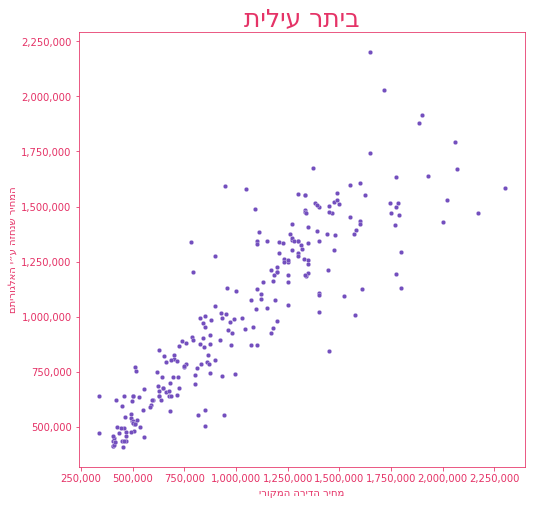

קרית ים
R2 Score: 0.8513
MSE sqrt: 122551.2832


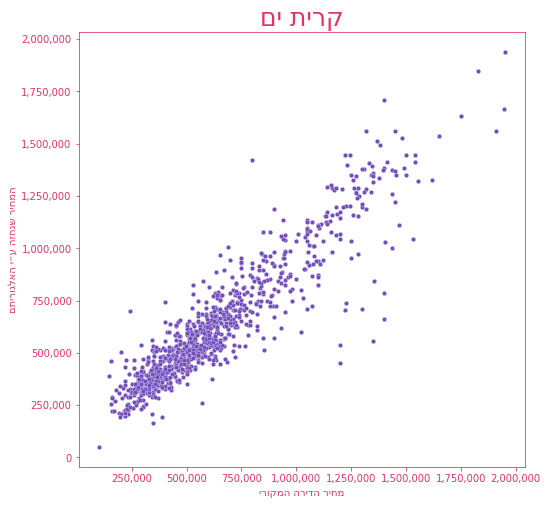

מגדל העמק
R2 Score: 0.7988
MSE sqrt: 120481.0296


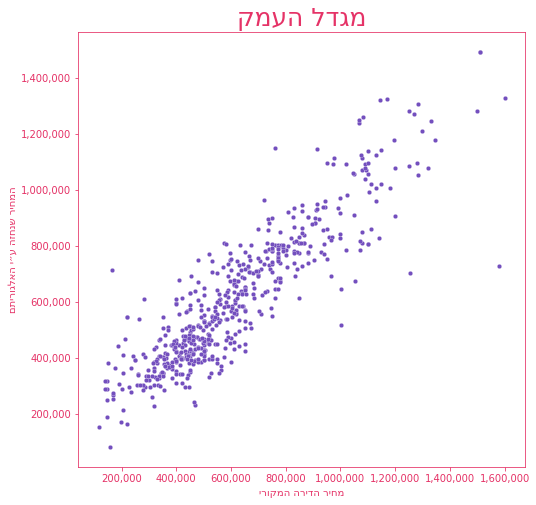

טירת כרמל
R2 Score: 0.8262
MSE sqrt: 168926.0353


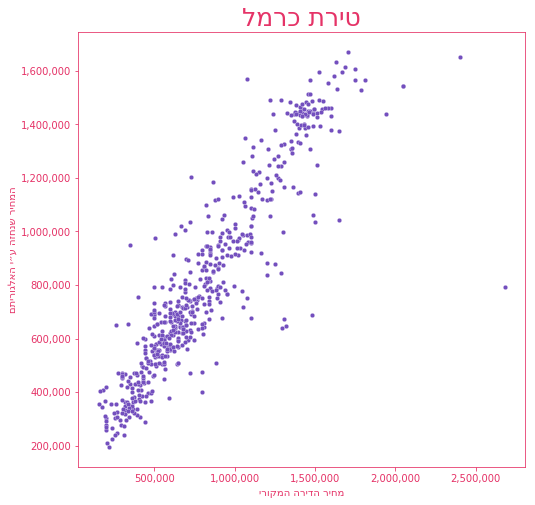

יקנעם עילית
R2 Score: 0.7482
MSE sqrt: 218496.0825


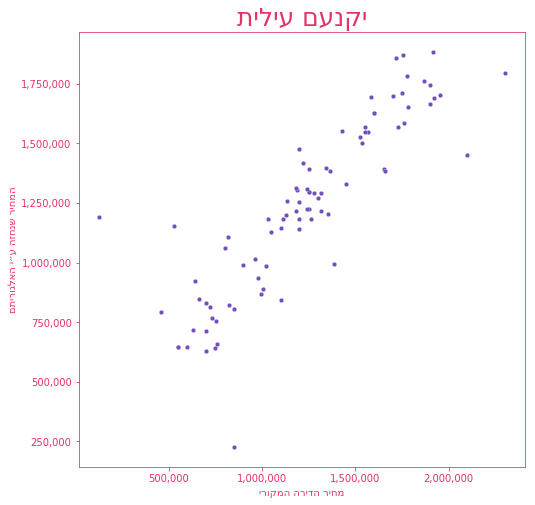

כרמיאל
R2 Score: 0.8582
MSE sqrt: 119701.0519


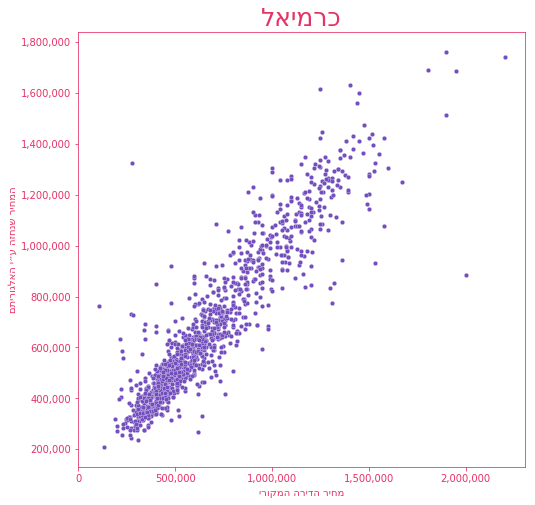

נתיבות
R2 Score: 0.8403
MSE sqrt: 110349.8701


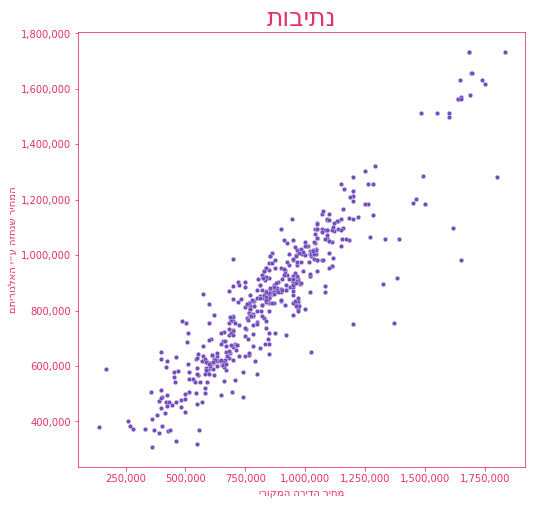

דימונה
R2 Score: 0.8134
MSE sqrt: 114275.9750


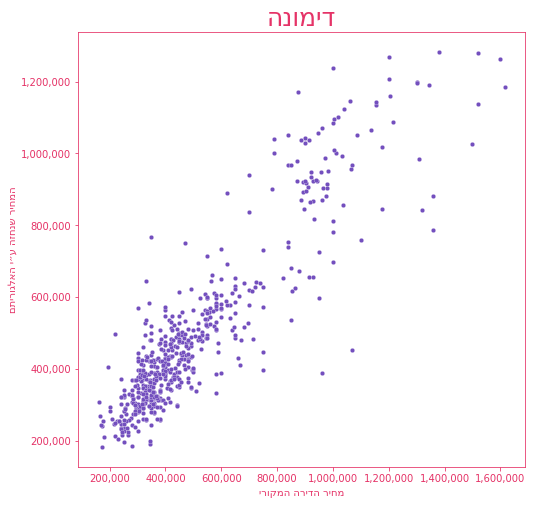

שדרות
R2 Score: 0.6458
MSE sqrt: 153749.7849


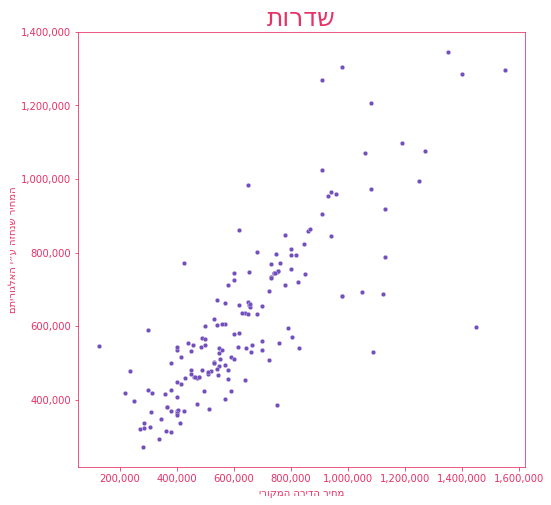

אופקים
R2 Score: 0.8252
MSE sqrt: 117082.4022


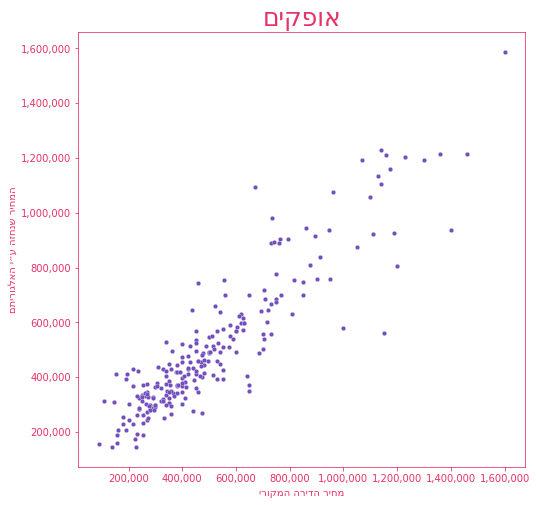

מעלות תרשיחא
R2 Score: 0.6474
MSE sqrt: 171564.1256


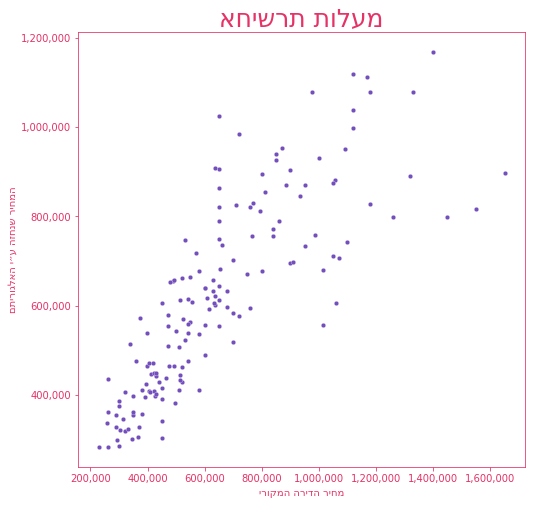

ערד
R2 Score: 0.8408
MSE sqrt: 90912.6660


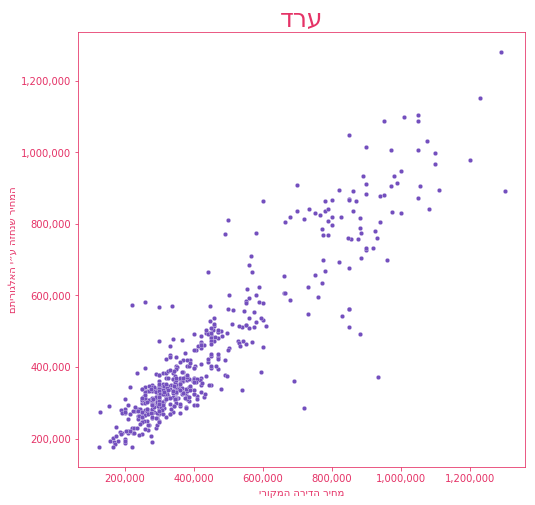

ירוחם
R2 Score: 0.6227
MSE sqrt: 128666.8910


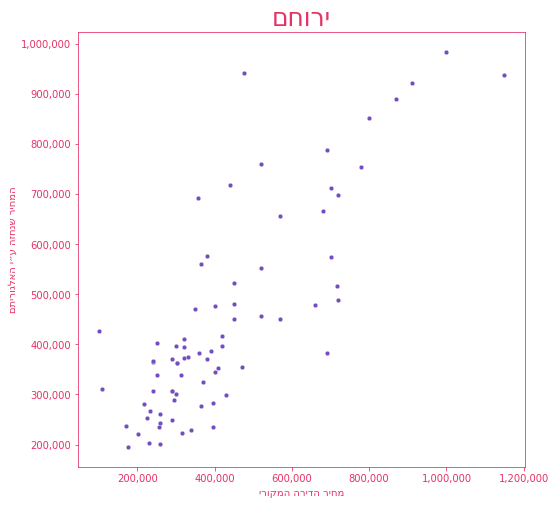

In [7]:
# https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html


for city in cities.keys():
    # get the rows of the city
    _df = df.loc[(df['city'] == city)]
    # removing outliers by 'final_price' column
    _df = remove_outlier(_df, 'final_price')
    print(city)

    X = _df[used_features]
    y = _df['final_price']

    # Preprocessing X columns by OneHotEncoder
    ohe = preprocessing.OneHotEncoder(handle_unknown='ignore')
    X = ohe.fit_transform(X)
    # saving processor algo for future use
    cities[city]["processor"] = ohe
    
    # split the date into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
#     # for tuning parameters
#     from sklearn.model_selection import GridSearchCV
#     param_grip = {
#         'learning_rate': [0.1, 0.05, 0.02],
#         'max_depth': [4, 6, 8],
#         'min_samples_leaf': [1, 3],
#         'max_features': [1.0, 0.3]
#     }
#     clf = GradientBoostingRegressor(n_estimators=1000)
#     gs_cv = GridSearchCV(clf, param_grip).fit(X_train, y_train)
#     print(gs_cv.best_params_)

    # initiate the Algo
    clf = GradientBoostingRegressor(n_estimators=450,
                                    max_depth=8,
                                    learning_rate=0.05,
                                    max_features=0.3,
                                    random_state=1)
    # fitting the algo with train set
    clf.fit(X_train, y_train)
    # saving the algo for future prediction
    cities[city]["algo"] = clf
    
    # Get Algo score and MSE values
    y_pred = clf.predict(X_test)
    print("R2 Score: %.4f" % clf.score(X_test, y_test))
    mse = mean_squared_error(y_test, clf.predict(X_test))
    cities[city]["mse"] = sqrt(mse)
    print("MSE sqrt: %.4f" % sqrt(mse))
    
    # Plot the results
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, s=20, edgecolor="white", linewidth='0.25', c="#734fbe", label="data")
    ax = plt.axes()
    plt.xlabel(bidialg.get_display('מחיר הדירה המקורי'), fontsize=10)
    plt.ylabel(bidialg.get_display('המחיר שנחזה ע״י האלגוריתם'), fontsize=10)
    plt.title(bidialg.get_display(city), fontsize=25)

    # format axes numbers to be with delimiter (e.g. 1000000 -> 1,000,000)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

    # Change plot axes colors
    sub_color = '#e53367'
    ax.spines['bottom'].set_color(sub_color)
    ax.spines['top'].set_color(sub_color) 
    ax.spines['right'].set_color(sub_color)
    ax.spines['left'].set_color(sub_color)
    # Use the following to change only the ticks:
    ax.tick_params(axis='x', colors=sub_color)
    ax.tick_params(axis='y', colors=sub_color)
    # And the following to change only the label:
    ax.yaxis.label.set_color(sub_color)
    ax.xaxis.label.set_color(sub_color)
    # And finally the title:
    ax.title.set_color(sub_color)

    folder = os.path.join("pickles", city)
    if not os.path.exists(folder):
        os.mkdir(folder)
    # Save plot figure
    plt.savefig(os.path.join(folder, "algo_fig.png"), format='png', dpi=300)
    plt.show()


## Testing If Prediction is working

In [8]:
# באר שבע
d = {
    'street': ["דוד הראובני", "יצחק רגר", "משה פריבס", "מאיר גרוסמן", "התקווה"], 
    'neighborhood': ["נוה מנחם", "שכונה ב'", "רמות הרכס", "נאות אילן", "מרכז אזרחי"],
    'property_type': ["דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות"], 
    'rooms_number': [4.0, 4.0, 4.0, 4.0, 4.0], 
    'floor': [2, 10, 2, 2, 2],
    'build_year': [2015, 2019, 2010, 2017, 2019],
    'building_mr': [115, 116, 120, 120, 113],
    'city': ["באר שבע", "באר שבע", "באר שבע", "באר שבע", "באר שבע"],
    'sale_day_year': [2019, 2019, 2019, 2019, 2019]
}
_X = pd.DataFrame(data=d)
print(_X.head())
_X = cities['באר שבע']["processor"].transform(_X)
y_pred = cities['באר שבע']["algo"].predict(_X)
print(y_pred.tolist())


        street neighborhood    property_type  rooms_number  floor  build_year  \
0  דוד הראובני     נוה מנחם  דירת בבית קומות           4.0      2        2015   
1     יצחק רגר     שכונה ב'  דירת בבית קומות           4.0     10        2019   
2    משה פריבס    רמות הרכס  דירת בבית קומות           4.0      2        2010   
3  מאיר גרוסמן    נאות אילן  דירת בבית קומות           4.0      2        2017   
4       התקווה   מרכז אזרחי  דירת בבית קומות           4.0      2        2019   

   building_mr     city  sale_day_year  
0          115  באר שבע           2019  
1          116  באר שבע           2019  
2          120  באר שבע           2019  
3          120  באר שבע           2019  
4          113  באר שבע           2019  
[1138581.983205751, 1253527.4337318542, 1079678.2630624354, 1073701.3211843548, 1328128.828782166]


## Dumping Algo

In [9]:
# saving objects
for city, values in cities.items():
    folder = os.path.join("pickles", city)
    if not os.path.exists(folder):
        os.mkdir(folder)
    joblib.dump(values["processor"], os.path.join(folder, "processor.joblib"))
    joblib.dump(values["algo"], os.path.join(folder, "algo.joblib"))

    with open(os.path.join(folder, "algo_mse.txt"), 'w') as fig:
        fig.write(str(values["mse"]))
